In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.backends.backend_pdf import PdfPages
files_list=os.listdir()

In [2]:
#loading GSDP file
if 'GSDP.csv' in files_list:
    gsdp=pd.read_csv('GSDP.csv')

In [3]:
# list of union territories
lst_UT=['Andaman & Nicobar Islands', 'Chandigarh', 'Delhi','Puducherry','Daman and Diu','Lakshwadeep',' Dadra and Nagar Haveli','Daman & Diu','Dadra & Nagar Haveli','A & N Islands','Lakshadweep']

#percentage of null values in each column
round(100*gsdp.isnull().sum()/gsdp.shape[0],2)


Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [4]:
#dropping West Bengal column
gsdp=gsdp.drop("West Bengal1",axis=1)
gsdp=gsdp.drop([5,10])

#percentage of null values after dropping null values
print(round(100*gsdp.isnull().sum()/gsdp.shape[0],2))

Items  Description            0.00
Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh             0.00
Assam                         0.00
Bihar                         0.00
Chhattisgarh                  0.00
Goa                           0.00
Gujarat                       0.00
Haryana                       0.00
Himachal Pradesh             22.22
Jammu & Kashmir               0.00
Jharkhand                     0.00
Karnataka                     0.00
Kerala                        0.00
Madhya Pradesh                0.00
Maharashtra                  22.22
Manipur                      22.22
Meghalaya                     0.00
Mizoram                      22.22
Nagaland                     22.22
Odisha                        0.00
Punjab                       22.22
Rajasthan                    22.22
Sikkim                        0.00
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      22.22
Uttar Pradesh       

In [5]:
# Dropping all union territories
gsdp
for ut in lst_UT:
    if ut in gsdp.columns:
        gsdp=gsdp.drop(ut,axis=1)
gsdp

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


In [6]:
gsdp=gsdp.loc[gsdp['Items  Description']=='(% Growth over previous year)']
gsdp.set_index('Duration',inplace=True)
gsdp=gsdp.drop('Items  Description',axis=1)
gsdp_s=gsdp.drop('All_India GDP',axis=1)

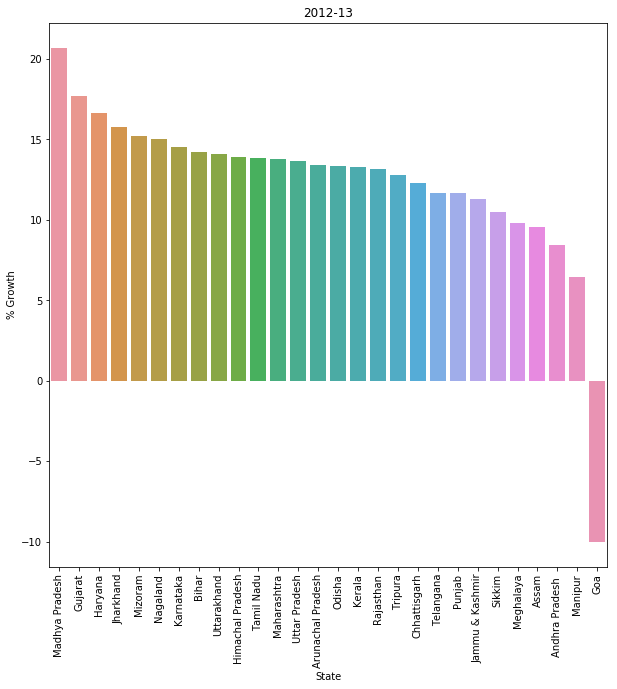

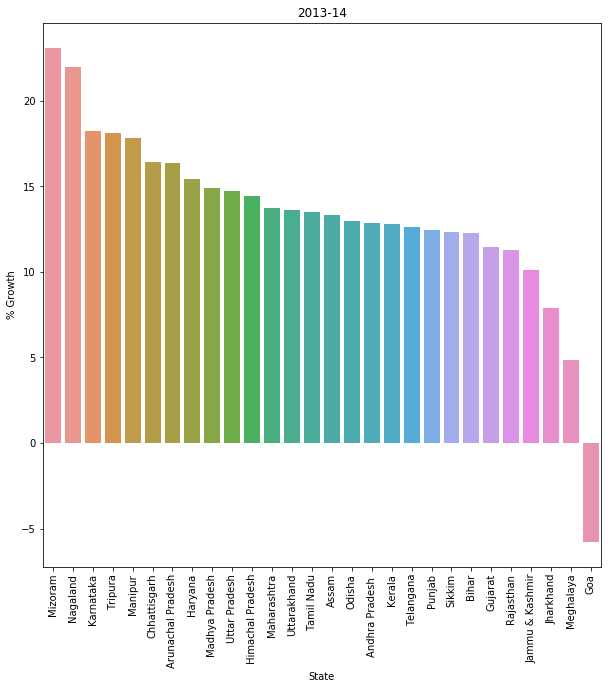

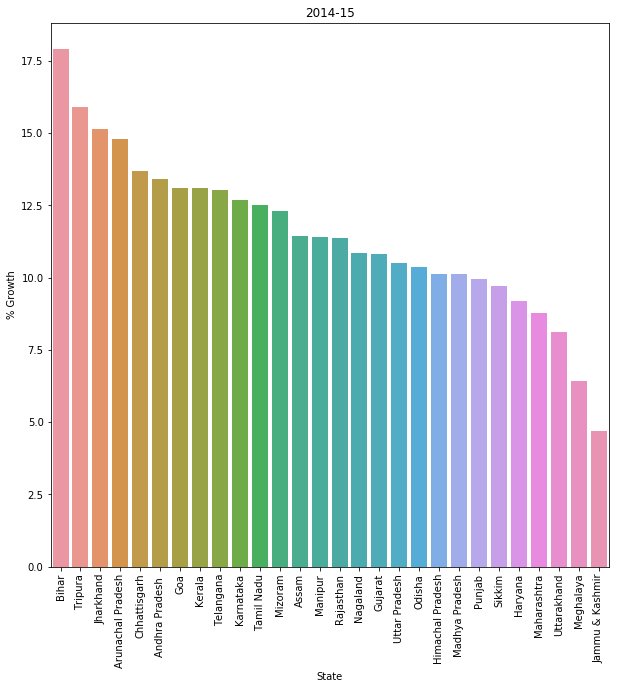

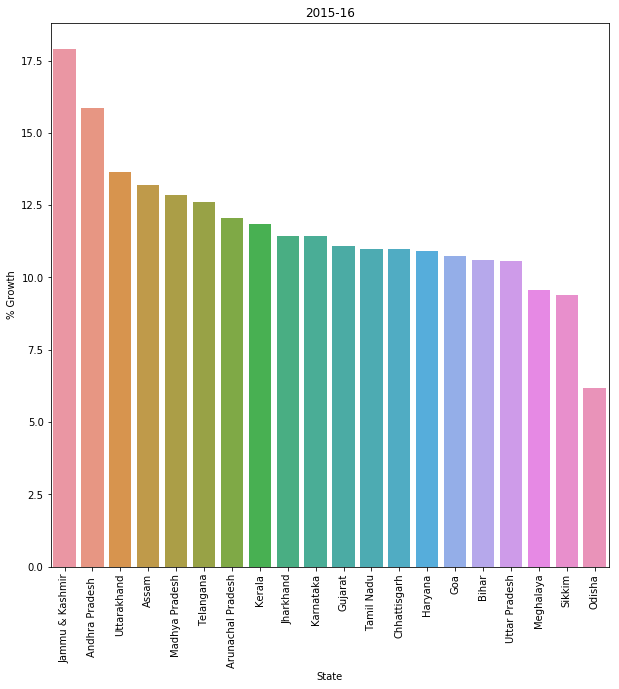

In [7]:
# 1. Plot a graph for rows " % Growth over previous year" for all the states (not union territories) 
# whose data is available, use as much data as possible for this exercise. 
# 2. Use the best fit line to represent the growth for each state.

index=gsdp_s.index
with PdfPages('State Growth Through the Years.pdf') as export_pdf:
    for ind in index:
        gsdp_in=gsdp_s.loc[gsdp_s.index==ind]
        gsdp_in=gsdp_in.transpose().dropna()
        gsdp_in=gsdp_in.sort_values(by=ind,ascending=False)
        gsdp_in=gsdp_in.transpose()
        plt.figure(figsize=(10,10))
        fig=sns.barplot(data=gsdp_in).get_figure()
        plt.xlabel('State')
        plt.ylabel('% Growth')
        plt.title(ind)
        plt.xticks(rotation=90)
        plt.show()
        export_pdf.savefig(fig)
        plt.close()

Q: Which states have been growing consistently fast, and which ones have been struggling? 
Rank top 3 fastest and 3 slowest-growing states.

A: States such as Andhra Pradesh, Arunachal Pradesh, and Karnataka have been consistently growing.

Sikkim, Jammu and Kashmir and  have been few states which have been the slowest growing states.

Goa is the only state which had a huge jump in % growth in 2014-15. Jumping from negative growth to a positive one.

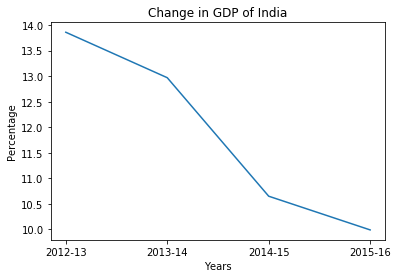

In [8]:
# 3. Draw a similar line graph for the nation as well.
with PdfPages("India's Growth Through the Years.pdf") as export_pdf:
    fig=plt.figure()
    plt.plot(gsdp['All_India GDP'])
    plt.xlabel('Years')
    plt.ylabel('Percentage')
    plt.title('Change in GDP of India')
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

In [9]:
# How will you compare the growth rates of any two states?
# Ans: By comparing the mean of the growth rates of the two states
print('Bihar',gsdp_s['Bihar'].mean())
print('Assam',gsdp_s['Assam'].mean())

Bihar 13.765
Assam 11.8775


In [10]:
# Which states have been growing consistently fast (find the difference in the durations for each state)
# Which ones have been struggling? 
# Rank top 3 fastest and 3 slowest-growing states
gsdp_s.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.00000,4.000000,3.000000,4.000000,4.000000
mean,12.63250,14.162500,11.877500,13.765000,13.352500,2.020000,12.76750,13.042500,12.816667,11.002500,...,15.953333,10.712500,11.346667,11.940000,10.492500,12.71250,12.497500,15.613333,12.367500,12.382500
std,3.09029,1.848952,1.763356,3.147809,2.336884,11.619934,3.29248,3.565234,2.333160,5.427162,...,5.622156,3.290414,1.266346,1.075035,1.324497,1.28001,0.569056,2.693127,2.150324,2.850478
min,8.43000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.82000,9.180000,10.140000,4.700000,...,10.850000,6.190000,9.950000,11.270000,9.390000,10.99000,11.700000,12.780000,10.510000,8.120000
25%,11.74500,13.075000,10.977500,11.872500,11.970000,-6.832500,11.02250,10.477500,12.015000,8.742500,...,12.940000,9.325000,10.810000,11.320000,9.637500,12.13000,12.382500,14.350000,10.562500,12.260000
50%,13.12500,14.100000,12.320000,13.275000,12.995000,2.490000,11.28000,13.180000,13.890000,10.700000,...,15.030000,11.660000,11.670000,11.370000,10.115000,13.01000,12.620000,15.920000,12.115000,13.645000
75%,14.01250,15.187500,13.220000,15.167500,14.377500,11.342500,13.02500,15.745000,14.155000,12.960000,...,18.505000,13.047500,12.045000,12.275000,10.970000,13.59250,12.735000,17.030000,13.920000,13.767500
max,15.85000,16.380000,13.310000,17.920000,16.440000,13.120000,17.69000,16.630000,14.420000,17.910000,...,21.980000,13.340000,12.420000,13.180000,12.350000,13.84000,13.050000,18.140000,14.730000,14.120000


In [11]:
# What is the Nation's average?
print(round(gsdp['All_India GDP'].mean(),3))

11.867


In [12]:
# What has been the average growth rate of your home state, and how does it compare to the national average?
print(round(gsdp_s['Kerala'].mean(),3))

#Ans: The average growth rate of Kerala is greater than the national average growth rate

12.752


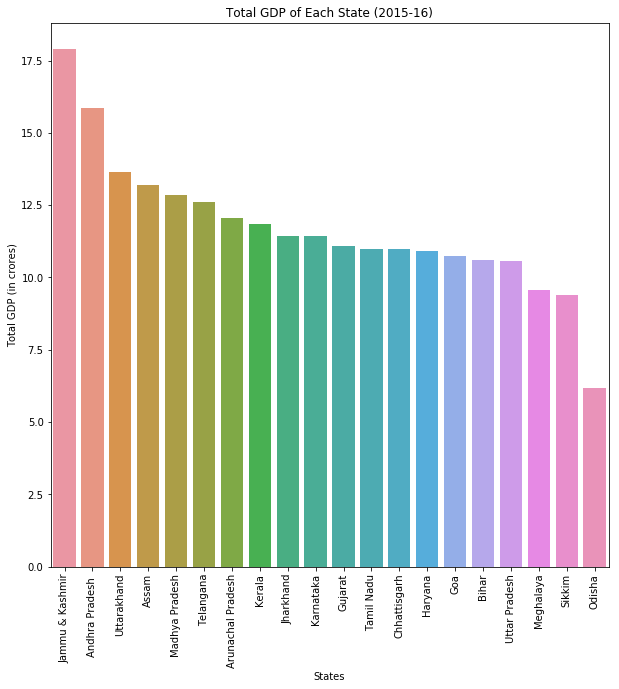

In [13]:
# Plot the total GDP of the states for the year 2015-16
tgsdp=gsdp_s

#Extracting only 2015-16 data
tgsdp=tgsdp.loc[tgsdp.index=='2015-16']

# Transposing the dataframe and dropping all null values
tgsdp=tgsdp.transpose().dropna()

# Sorting the column in descending order
tgsdp=tgsdp.sort_values(by='2015-16',ascending=False)

# Transpose again
tgsdp=tgsdp.transpose()

# Plotting the bar graph
with PdfPages("Total GDP of Each State.pdf") as export_pdf:
    plt.figure(figsize=(10,10))
    fig=sns.barplot(data=tgsdp).get_figure()
    plt.xticks(rotation=90)
    plt.xlabel('States')
    plt.ylabel('Total GDP (in crores)')
    plt.title('Total GDP of Each State (2015-16)')
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

In [14]:
# Identify the top 5 and the bottom 5 states based on total GDP.
tgsdp=tgsdp.transpose()
print('Top 5 states')
print(tgsdp.head(5))
print('--------------------------')
print('Bottom 5 states')
print(tgsdp.tail(5))

Top 5 states
Duration         2015-16
Jammu & Kashmir    17.91
Andhra Pradesh     15.85
Uttarakhand        13.65
Assam              13.19
Madhya Pradesh     12.86
--------------------------
Bottom 5 states
Duration       2015-16
Bihar            10.59
Uttar Pradesh    10.58
Meghalaya         9.58
Sikkim            9.39
Odisha            6.19


Q: What insights can you draw from this graph? 
What states are performing poorly? (Remember: this will not be solely based on total GDP)

A: Sikkim (one of the poor performers in terms of % growth) is one of the few states which have low total gdp, compared to other states.
Tamil Nadu - is the state with huge total gdp but the % growth over the years, is just average - meaning 



In [15]:
# Part I-B

# First joined all datasets into one dataframe and filtered out for 2014-15
dfSub=pd.read_csv('Assam.csv')
dfSub=dfSub[['S.No.','Item','2014-15']]
dfSub=dfSub.rename(columns={'2014-15':'Assam.csv'})
for file in files_list:
    if '.csv' in file and file not in lst_UT and file not in ['Dropout_Rate.csv','GSDP.csv','Assam.csv']:
        df1=pd.read_csv(file)
        df1['Item'] = df1['Item'].apply(lambda x : str(x).strip('*'))
        df1['S.No.'] = df1['S.No.'].apply(lambda x : str(x).strip(' '))
        df1['S.No.'] = df1['S.No.'].apply(lambda x : str(x).strip('.'))
        df1=df1[['S.No.','Item','2014-15']]
        df1=df1.rename(columns={'2014-15':file})
        data_frames = [dfSub, df1]
        dfSub= reduce(lambda  left,right: pd.merge(left,right,on=['S.No.','Item'], how='outer'), data_frames)
        state=dfSub[['S.No.','Item']]
        for col in dfSub.columns:
            if col in files_list:
                dfz=dfSub[col]
                state=pd.concat([state,dfz],axis=1)
state=state.drop(['S.No.'],axis=1)        
state.rename(columns={colm: colm.split('.')[0] for colm in state.columns},inplace=True)
state.rename(columns={colm: colm.split('_')[0]+' '+colm.split('_')[1] for colm in state.columns if '_' in colm}, inplace=True)
state

,Item,Assam,Andhra Pradesh,Arunachal Pradesh,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
0,"Agriculture, forestry and fishing",3855548,14819416,686117,7951890,3948847,308507,13769969.00,8015238.0,1514981,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825.0,1601423.0,25097754
1,Crops,2890544,7893514,415520,4688237,2613371,140421,9671086.00,4636731.0,853758,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591.0,866146.0,16215212
2,Livestock,173478,4309078,38387,2060296,352208,30141,2698910.00,2916173.0,110304,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176.0,391188.0,7096876
3,Forestry and logging,261987,346160,224017,550132,597785,15744,761616.00,352254.0,540950,...,99802,791463,848245,1956660,4529,392705,210741,145096.0,339293.0,1404936
4,Fishing and aquaculture,529539,2270664,8193,653224,385483,122201,638357.00,110080.0,9968,...,8470,460636,107657,58036,604,680352,266968,168961.0,4796.0,380730
5,Mining and quarrying,1471149,1484300,30842,68107,2451970,3622,2117218.00,25186.0,33385,...,8280,2586328,10354,4069385,1329,265536,1541853,142391.0,244549.0,901501
6,Primary,5326697,16303716,716959,8019997,6400817,312129,15887187.00,8040424.0,1548366,...,616178,9009306,9296070,19113780,138776,13329774,9133354,942216.0,1845972.0,25999255
7,Manufacturing,2002936,4672266,26120,2189965,4370593,1177608,24087538.00,7756921.0,2543637,...,18346,5754229,4790341,6552580,550697,18914794,6353711,228625.0,5866252.0,12261649
8,"Electricity, gas, water supply & other utility...",296587,1151729,113527,345168,1198438,204110,3409983.00,1101919.0,767268,...,37944,833067,911611,1122888,212499,1710379,716266,77870.0,433880.0,2030625
9,Construction,1733568,4664889,147842,3449763,2669855,165819,5526017.00,3702571.0,808256,...,156072,2402396,2202962,5353326,82058,12216718,2854024,177899.0,1342733.0,11256450


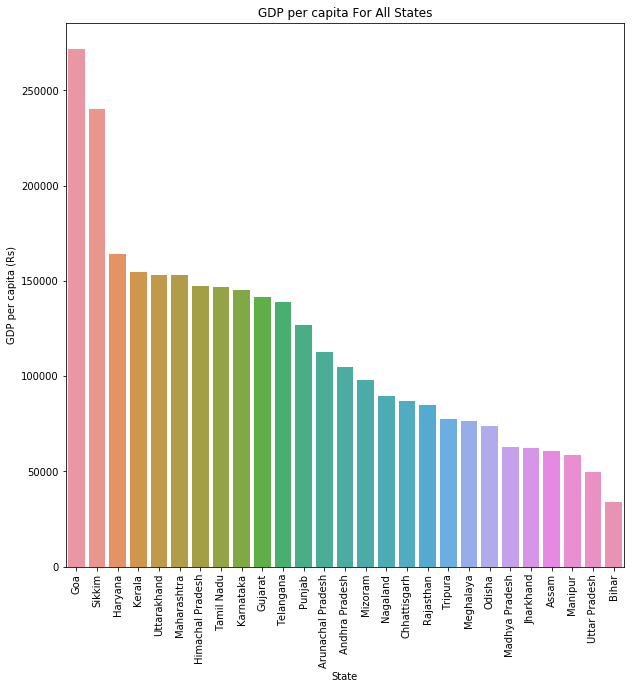

In [16]:
# Plot the GDP per capita for all the states
state_pcgsdp=state.tail(1)
state_pcgsdp.set_index('Item',inplace=True)
state_pcgsdp=state_pcgsdp.transpose().dropna()
state_pcgsdp=state_pcgsdp.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
state_pcgsdp=state_pcgsdp.transpose()

with PdfPages("GDP Per Capita for All States.pdf") as export_pdf:
    plt.figure(figsize=(10,10))
    fig=sns.barplot(data=state_pcgsdp).get_figure()
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel('GDP per capita (Rs)')
    plt.title('GDP per capita For All States')
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

In [17]:
# Identify the top 5 and the bottom 5 states based on the GDP per capita.
state_pcgsdp=state_pcgsdp.transpose()
print("Top 5 states")
print(state_pcgsdp.head(5))
print('--------------------------')
print("Bottom 5 states")
print(state_pcgsdp.tail(5))

Top 5 states
Item         Per Capita GSDP (Rs.)
Goa                       271793.0
Sikkim                    240274.0
Haryana                   164077.0
Kerala                    154778.0
Uttarakhand               153076.0
--------------------------
Bottom 5 states
Item           Per Capita GSDP (Rs.)
Jharkhand                    62091.0
Assam                        60621.0
Manipur                      58442.0
Uttar Pradesh                49450.0
Bihar                        33954.0


In [18]:
# Find the ratio of the highest per capita GDP to the lowest per capita GDP.
print('Ratio fo highest per capita GDP to lowest per capita GDP =', round(state_pcgsdp['Per Capita GSDP (Rs.)'][0]/state_pcgsdp['Per Capita GSDP (Rs.)'][-1],1))

Ratio fo highest per capita GDP to lowest per capita GDP = 8.0


In [19]:
state=state.set_index('Item')
state=state.transpose()

In [20]:
# Plot the percentage contribution of the primary, secondary and tertiary sectors 
# as a percentage of the total GDP for all the states.

state['% Primary']=(state.Primary.astype("float")/state['Gross State Domestic Product'].astype('float'))*100
state['% Secondary']=(state.Secondary.astype('float')/state['Gross State Domestic Product'].astype('float'))*100
state['% Tertiary']=(state.Tertiary.astype('float')/state['Gross State Domestic Product'].astype('float'))*100
state['Total of P,S,T']=state['% Primary']+state['% Secondary']+state['% Tertiary']
state

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),% Primary,% Secondary,% Tertiary,"Total of P,S,T"
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,18666897.0,1725309.00,582406.0,19809800.0,326780.0,60621.0,26.889201,20.359070,46.982347,94.230618
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,48825542.0,5512100.00,1690800.0,52646842.0,501510.0,104977.0,30.968080,19.923102,41.850453,92.741635
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,1636292.0,70099.00,30272.0,1676119.0,14870.0,112718.0,42.774946,17.152064,37.696846,97.623856
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,36184863.0,3213546.00,2006421.0,37391988.0,1101240.0,33954.0,21.448437,16.005825,59.317437,96.771699
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,22228481.0,2601791.00,1332092.0,23498180.0,270530.0,86860.0,27.239629,35.061805,32.295173,94.596607
Goa,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,3597882.0,527279.00,61854.0,4063307.0,14950.0,271793.0,7.681649,38.085628,42.778382,88.545660
Gujarat,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,...,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,17.750506,36.896684,33.764756,88.411945
Haryana,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,39828404.0,4985670.00,1067867.0,43746207.0,266620.0,164077.0,18.379705,28.714286,43.950252,91.044243
Himachal Pradesh,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,808256.0,...,9800853.0,895317.00,259291.0,10436879.0,70840.0,147330.0,14.835527,39.467373,39.603084,93.905985
Jharkhand,3211065.0,2094466.0,562503.0,445149.0,108947.0,2037289.0,5248354.0,4114148.0,337489.0,1789834.0,...,19623166.0,2499171.00,411619.0,21710718.0,349660.0,62091.0,24.174023,28.748340,37.462331,90.384694


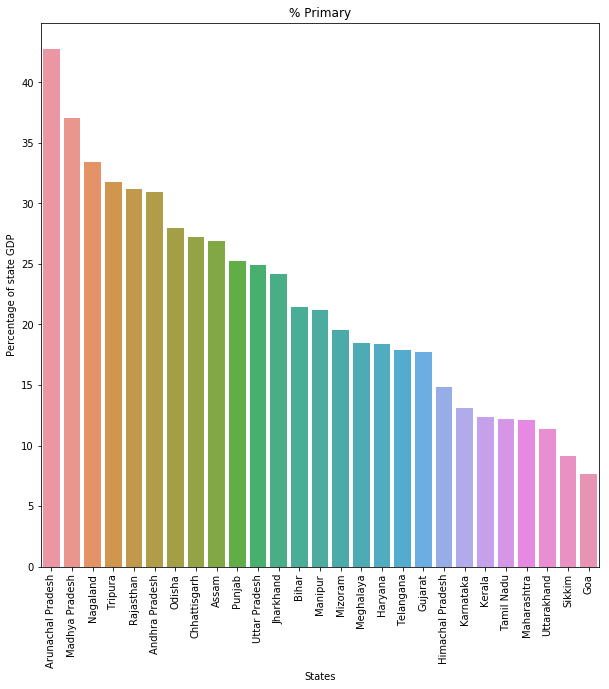

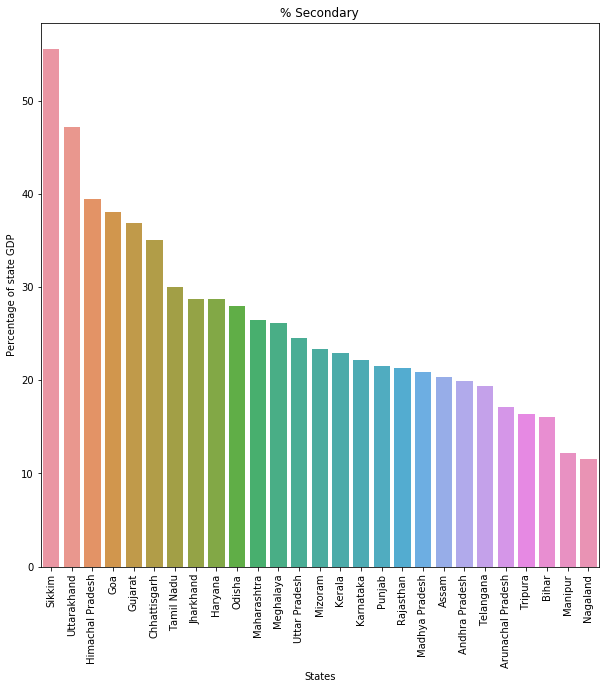

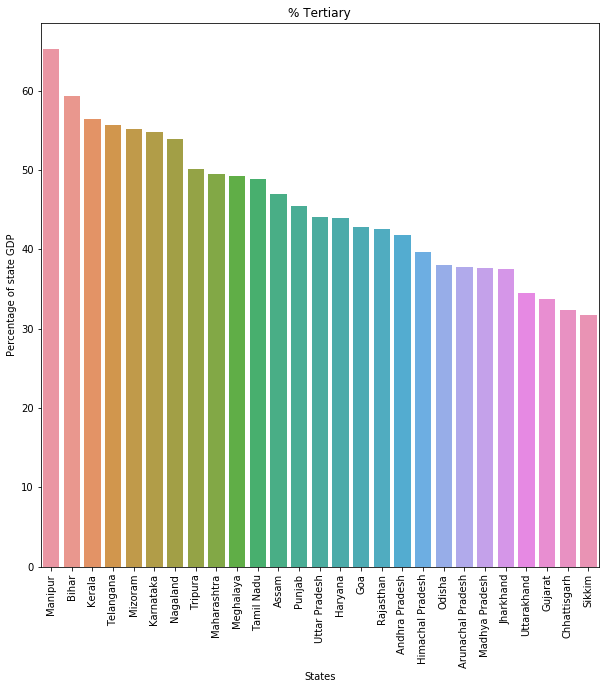

In [21]:
state=state.transpose()
with PdfPages("Percent Contribution of each sector GDP.pdf") as export_pdf:
    for i in state.index:
        if i in ['% Primary','% Secondary','% Tertiary']:
            temp=state.loc[state.index==i]
            temp=temp.transpose()
            temp=temp.sort_values(by=i,ascending=False)
            temp=temp.transpose()
            plt.figure(figsize=(10,10))
            fig=sns.barplot(data=temp).get_figure()
            plt.xlabel('States')
            plt.ylabel('Percentage of state GDP')
            plt.title(i)
            plt.xticks(rotation=90)
            plt.show()
            export_pdf.savefig(fig)
            plt.close()

Q: Which plot will you use here? Why?
A: Use a bar plot in descending order so that it is easy to compare the contribution of each sector in each state

Q: Why is (Primary + Secondary + Tertiary) not equal to total GDP?
A: The sum of Primary, Secondary and Tertiary is not equal to total GDP because tax on each product and subsidy is not considered

Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.


In [22]:
# Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest 
# per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 
# 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on

temp=pd.DataFrame(state.loc['Per Capita GSDP (Rs.)',:])
quant=temp.quantile([0.20,0.5,0.85,1],axis=0)
quant_list=[quant.loc[i,'Per Capita GSDP (Rs.)'] for i in quant.index]

c1=state
c1=state.drop(state.columns,axis=1)
c4=c3=c2=c1
for i in state.columns:
    if state.loc['Per Capita GSDP (Rs.)',i]>=quant_list[2] and state.loc['Per Capita GSDP (Rs.)',i]<=quant_list[3]:
        c1=pd.concat([c1,state[i]],axis=1)
    elif state.loc['Per Capita GSDP (Rs.)',i]>=quant_list[1] and state.loc['Per Capita GSDP (Rs.)',i]<quant_list[2]:
        c2=pd.concat([c2,state[i]],axis=1)
    elif state.loc['Per Capita GSDP (Rs.)',i]>=quant_list[0] and state.loc['Per Capita GSDP (Rs.)',i]<quant_list[1]:
        c3=pd.concat([c3,state[i]],axis=1)
    else:
        c4=pd.concat([c4,state[i]],axis=1)

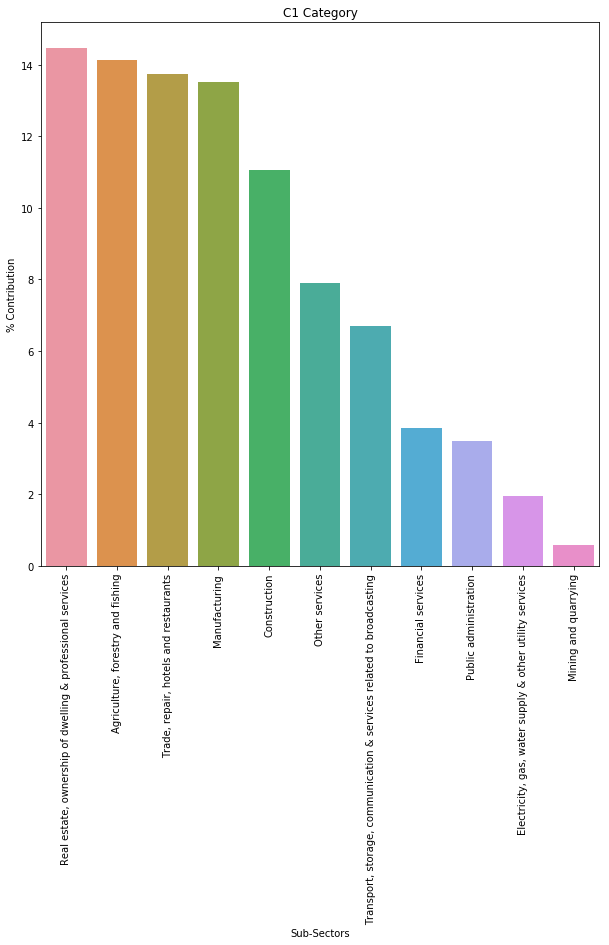

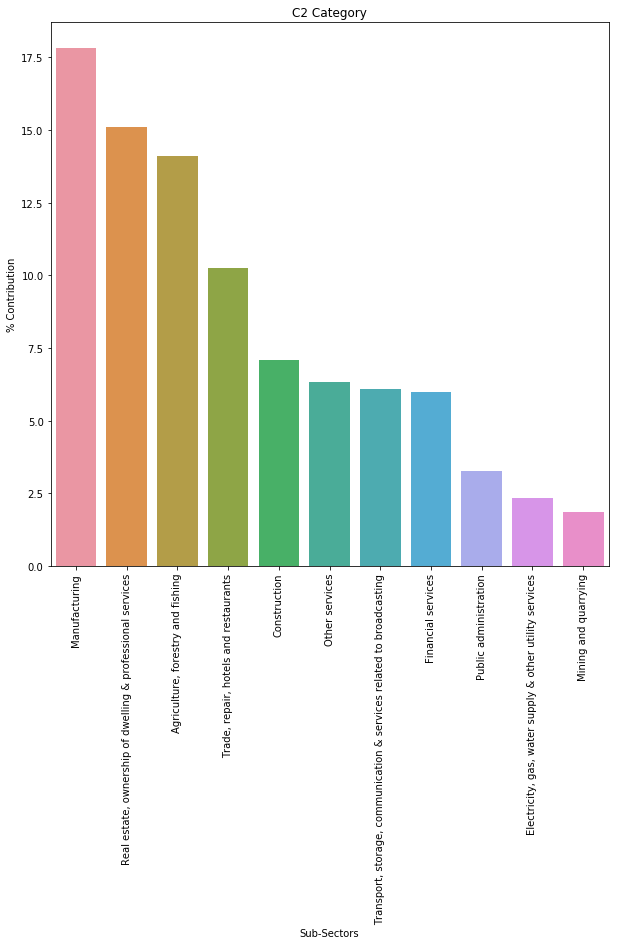

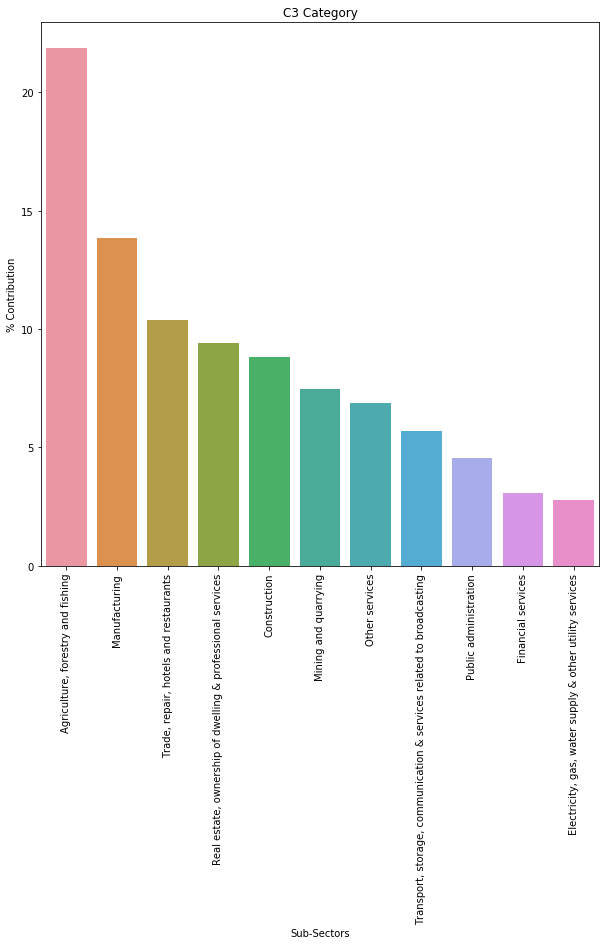

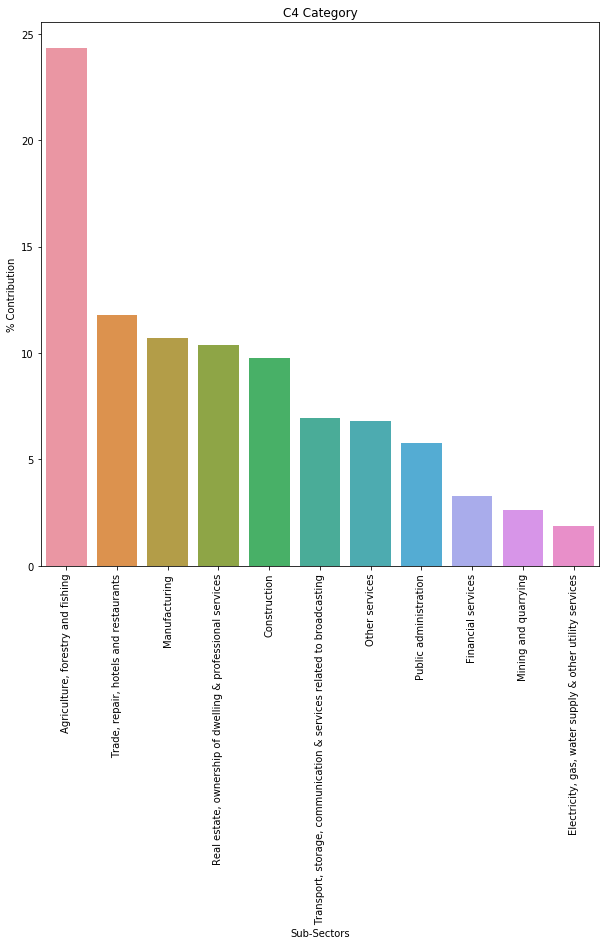

In [23]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP of each category
with PdfPages("Contribution of each category.pdf") as export_pdf:
    c1=c1.transpose()
    for i in c1.columns:
        if i not in ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)']:
            c1=c1.drop(i,axis=1)
    c1=c1.transpose()
    c1['Total of Sub-Sector']=c1.sum(axis=1)
    c1['% Contribution']=round((c1['Total of Sub-Sector'].astype('float')/c1.loc['Gross State Domestic Product','Total of Sub-Sector'].astype('float'))*100,2)
    c1=c1.sort_values(by='% Contribution',ascending=False)
    c1=c1.transpose()
    temp=c1.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=1)
    temp=temp.transpose()
    plt.figure(figsize=(10,10))
    fig=sns.barplot(x=temp.index,y='% Contribution',data=temp).get_figure()
    plt.xlabel('Sub-Sectors')
    plt.ylabel('% Contribution')
    plt.title('C1 Category')
    plt.xticks(rotation=90)
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

    c2=c2.transpose()
    for i in c2.columns:
        if i not in ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)']:
            c2=c2.drop(i,axis=1)
    c2=c2.transpose()
    c2['Total of Sub-Sector']=c2.sum(axis=1)
    c2['% Contribution']=round((c2['Total of Sub-Sector'].astype('float')/c2.loc['Gross State Domestic Product','Total of Sub-Sector'].astype('float'))*100,2)
    c2=c2.sort_values(by='% Contribution',ascending=False)
    c2=c2.transpose()
    temp=c2.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=1)
    temp=temp.transpose()
    plt.figure(figsize=(10,10))
    fig2=sns.barplot(x=temp.index,y='% Contribution',data=temp).get_figure()
    plt.xlabel('Sub-Sectors')
    plt.ylabel('% Contribution')
    plt.title('C2 Category')
    plt.xticks(rotation=90)
    plt.show()
    export_pdf.savefig(fig2)
    plt.close()

    c3=c3.transpose()
    for i in c3.columns:
        if i not in ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)']:
            c3=c3.drop(i,axis=1)
    c3=c3.transpose()
    c3['Total of Sub-Sector']=c3.sum(axis=1)
    c3['% Contribution']=round((c3['Total of Sub-Sector'].astype('float')/c3.loc['Gross State Domestic Product','Total of Sub-Sector'].astype('float'))*100,2)
    c3=c3.sort_values(by='% Contribution',ascending=False)
    c3=c3.transpose()
    temp=c3.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=1)
    temp=temp.transpose()
    plt.figure(figsize=(10,10))
    fig3=sns.barplot(x=temp.index,y='% Contribution',data=temp).get_figure()
    plt.xlabel('Sub-Sectors')
    plt.ylabel('% Contribution')
    plt.title('C3 Category')
    plt.xticks(rotation=90)
    plt.show()
    export_pdf.savefig(fig3)
    plt.close()

    c4=c4.transpose()
    for i in c4.columns:
        if i not in ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)']:
            c4=c4.drop(i,axis=1)
    c4=c4.transpose()
    c4['Total of Sub-Sector']=c4.sum(axis=1)
    c4['% Contribution']=round((c4['Total of Sub-Sector'].astype('float')/c4.loc['Gross State Domestic Product','Total of Sub-Sector'].astype('float'))*100,2)
    c4=c4.sort_values(by='% Contribution',ascending=False)
    c4=c4.transpose()
    temp=c4.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=1)
    temp=temp.transpose()
    plt.figure(figsize=(10,10))
    fig4=sns.barplot(x=temp.index,y='% Contribution',data=temp).get_figure()
    plt.xlabel('Sub-Sectors')
    plt.ylabel('% Contribution')
    plt.title('C4 Category')
    plt.xticks(rotation=90)
    plt.show()
    export_pdf.savefig(fig4)
    plt.close()

For all categories, 'Agriculture, forestry and fishing' is one of the top three contributing subsector. However, in C3 and C4 categories, there is a huge jump in the % of contribution from the highest contributing subsector to the second highest contributing subsector.
In C1 category, the contribution % between the first four subsectors are within a small range, comparable to each other.
'Electricity, gas, water & other utility services' subsector is one of the main subsectors which is consistently having low contribution in each category. Improving this subsector can improve the GDP since the basic necessity of water and electricity will be availabe to the general public, allowing them to work more efficiently and productively.


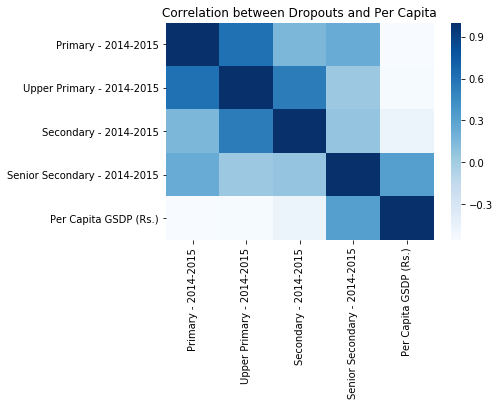

In [24]:
# Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and 
# secondary) for the year 2014-2015 for each state. 
# Choose an appropriate plot to conduct this analysis.

# Reading in the drop rate file and cleaning the data
for i in files_list:
    if i == 'Dropout_Rate.csv':
        droprate=pd.read_csv(i)

droprate.rename(columns={'Primary - 2014-2015':'Primary - 2013-2014',
                    'Primary - 2014-2015.1' : 'Primary - 2014-2015',
                        'Level of Education - State' : 'Item'},inplace=True)

droprate.set_index('Item', inplace=True)
droprate.rename(index={'Uttrakhand': 'Uttarakhand',
                        'Chhatisgarh': 'Chhattisgarh'},inplace=True)
droprate=droprate.transpose()
for colm in droprate.columns:
    if colm in lst_UT:
        droprate=droprate.drop(colm,axis=1)
droprate=droprate.drop(['All India'], axis=1)
droprate=droprate.transpose()
for col in droprate.columns:
    if '2014-2015' not in col:
        droprate=droprate.drop(col,axis=1)
droprate=droprate.apply(pd.to_numeric)

#Creating a new dataframe which has only per capita of all the states
state_gdp=state.transpose()
for col in state_gdp.columns:
    if col != 'Per Capita GSDP (Rs.)':
        state_gdp.drop(col,axis=1,inplace=True)
        
# Merging the two dataframes
drop_gdp=droprate.join(state_gdp)

# Finding the correlation between dropout and per capita
with PdfPages("Correlation between dropout and per capita.pdf") as export_pdf:
    fig=sns.heatmap(drop_gdp.corr(),cmap='Blues').get_figure()
    plt.title('Correlation between Dropouts and Per Capita')
    plt.show()
    export_pdf.savefig(fig)
    plt.close()


From the heat map above, it is clear that, higher the education level and higher the per capita GDP, higher the dropout rates

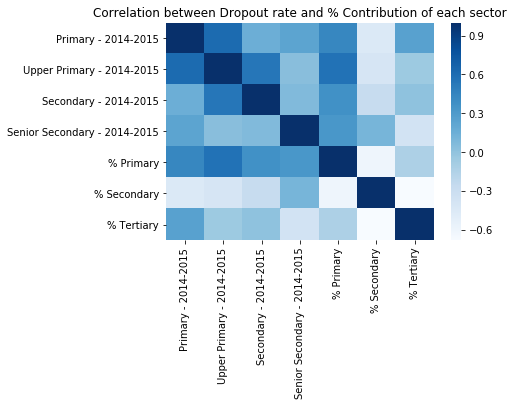

In [25]:
# Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) 
# to the total GDP?
drop_sec=state.loc[['% Primary','% Secondary','% Tertiary'],:]
drop_sec=drop_sec.transpose()
drop_sec=droprate.join(drop_sec)
with PdfPages("Correlation between dropout and contribution.pdf") as export_pdf:
    fig=sns.heatmap(drop_sec.corr(method='pearson'),cmap='Blues').get_figure()
    plt.title('Correlation between Dropout rate and % Contribution of each sector')
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

The correlation between dropout rate and % contribution of each sector is interesting since:
a. The tertiary sector has the highest dropout rate in primary level of education
b. The secondary sector has the highest dropout rate in senior secondary level
c. Primary sector has the highest dropout rate in upper primary level
d. Looking at the shade of the color, primary sector has the most number of dropouts, out of all the sectors (for all levels of education, the color is blue)
d. Secondary sector has the least number of dropouts, out of all the sectors (for all levels of educaiton, the color remains in the white shade)

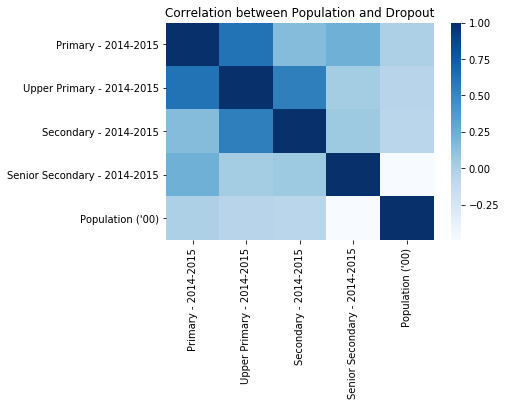

In [26]:
# You have the total population of each state from the data in part I. Is there any correlation between dropout rates and 
# population? What is the expected trend and what is the observation?
drop_pop=state.loc["Population ('00)",:]
drop_pop=drop_pop.transpose()
drop_pop=droprate.join(drop_pop)
with PdfPages("Correlation between dropout rate and population.pdf") as export_pdf:
    fig=sns.heatmap(drop_pop.corr(),cmap='Blues').get_figure()
    plt.title("Correlation between Population and Dropout")
    plt.show()
    export_pdf.savefig(fig)
    plt.close()

There are less number of people dropping out as the education level increases. One would believe, that as the education
level increases, the drop out rates are higher since the education curriculum gets harder at Secondary and Senior Secondary 
levels.
